# 03.파이썬라이브러리-Matplotlib

## matplotlib 설치하기

In [2]:
# 최초 한번만 실행하기
!pip install matplotlib    

### matplotlib 버전 확인 

In [3]:
import matplotlib 

matplotlib.__version__

'3.5.2'

-----------

## matplotlib 사용 예:
- https://matplotlib.org/cheatsheets/_images/cheatsheets-1.png 
- https://matplotlib.org/cheatsheets/_images/cheatsheets-2.png

### 1. 단일 그래프 표현

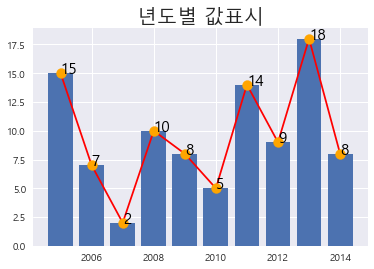

In [15]:
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # NanumGothic

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 4)  # (가로,세로) 인치 단위

# X축, Y축 데이터
X = list(range(2005,2015,1))
Y = [15,7,2,10,8,5,14,9,18,8]

plt.bar(X, Y, zorder=1)           # 막대 그래프
plt.plot(X, Y, c='r', zorder=2)   # 선 그래프
plt.scatter(X, Y, s=100, c='orange', zorder=3)  # 점 그래프

# 그래프에 값(text)표시하기
for x, y in zip(X,Y):
    plt.text(x, y, y, color='k', fontsize=15)

    
plt.grid(True)
plt.title('년도별 값표시', fontsize=20)             # 그래프 제목 

plt.style.use('seaborn')        # 그래프 스타일, default(default), dark_background, seaborn-whitgrid, Solarize_Light2

plt.savefig('image/basic.png')  # 그래프 저장하기

plt.show()  # 그래프 나타내기

### 2. 하나의 그래프에 여러 개 서브그래프 표현
- colormap : default(viridis) min:보라, max:노랑
- https://matplotlib.org/tutorials/colors/colormaps.html

Figure(640x480) [[<AxesSubplot:> <AxesSubplot:>]
 [<AxesSubplot:> <AxesSubplot:>]]


<Figure size 1000x600 with 0 Axes>

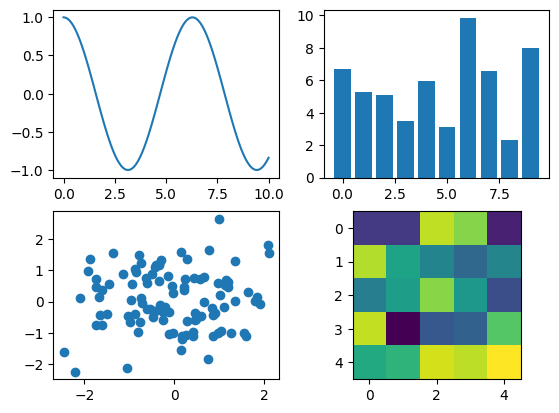

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 크기 설정
# plt.rcParams['figure.figsize'] = (10, 6)  # (가로,세로) 인치 단위
plt.figure(figsize=(10, 6))     # (10,6) 인치 그래프

# # 그래프 축에서 마이너스 표시
# plt.rcParams['axes.unicode_minus'] = False

# 그래프 공간 설정
fig, ax = plt.subplots(2,2)      # 2행 2열 그래프 공간
print(fig, ax)

plt.style.use('default') 

# 선 그래프
X = np.linspace(0, 10, 100)      # 0~10사이의 선형 분포 100개 
Y = np.cos(X)                    # X의 코사인 값
ax[0,0].plot(X, Y)               # 선 그래프

# 막대 그래프
X = np.arange(10)                # 0~9사이의 연속값
Y = np.random.uniform(1,10,10)   # 균일분포값 생성
ax[0,1].bar(X, Y)                # 막대 그래프

# 점 그래프
X = np.random.randn(100)         # 정규 분포를 가지는 데이터
Y = np.random.randn(100)         # 정규 분포를 가지는 데이터
ax[1,0].scatter(X, Y)

# 분포를 2D 이미지 그림으로
Z = np.random.uniform(0,1,(5,5)) # 0~1사이의 균일분포값을 5행x5열
ax[1,1].imshow(Z)                # 2D 이미지 그림으로 표현

plt.show()

### 3.파일 데이터 읽어서 그래프로 데이터 분석하기
- 머신러닝 학습 용 데이터 : 1978년 보스턴 집값 데이터
- feature: 독립변수(범죄율, 강인접여부, 일산화질소, 방개수, 학생/교사비율, 흑인의 비율)
- target: 종속변수(주택가격) 간의 관계를 그래프로 시각화하여 분석해 본다.
- 변수 정보
> 1. 자치시별 1인당 범죄율(CRIM)
> 2. 강인접여부(CHAS) - 1:예, 0:아니오 
> 3. 10ppm 당 농축 일산화질소(NOX)
> 4. 방개수(RM)  
> 5. 학생/교사비율(PTRATIO)
> 6. 자치시(town)별 흑인의 비율(B)
> 7. 주택가격(MEDV) 

#### -변수들 그래프로 나타내기

14 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


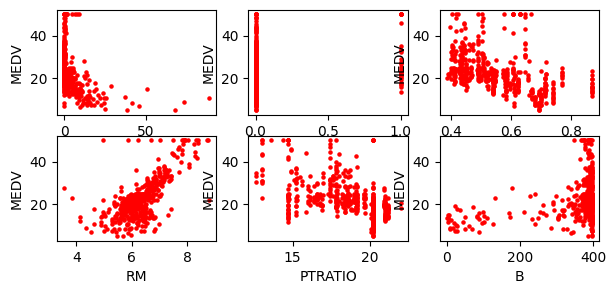

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.데이터 불러오기
df = pd.read_csv('data/HousingData.csv') 
print(len(df.columns), df.columns)
#df

# 2.독립변수와 종속변수 간 그래프로 나타내기
cols = ['CRIM','CHAS','NOX','RM','PTRATIO','B'] # 독립변수
plt.figure(figsize=(7, 3))   # 그래프 크기
p = 1
for col in cols:
    plt.subplot(2,3,p)   # 2 x 5 행렬로 이뤄진 하위 그래프에서 p에 따라 위치를 지정
    plt.scatter(df[col],df['MEDV'],color ='r', s=5)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    p += 1
plt.show()

#### - 변수들 간의 상관관계 분석(Correlation analysis)하기
- https://ko.wikipedia.org/wiki/%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98

- 상관관계 분석:  두 변수 간에 어떤 선형적 관계를 갖고 있는 지를 분석하는 방법이다
- 상관 계수(Correlation coefficient): 상관관계의 정도를 파악하는 두 변수간의 연관된 정도를 나타냄
- 피어슨 상관 계수는 코시-슈바르츠 부등식에 의해 +1과 -1 사이의 값을 가지며
> - +1은 완벽한 양의 선형 상관 관계, 
> - 0은 선형 상관 관계 없음, 
> - -1은 완벽한 음의 선형 상관 관계

상관계수:              CRIM      CHAS       NOX        RM   PTRATIO         B
CRIM     1.000000 -0.054355  0.417130 -0.219150  0.281110 -0.381411
CHAS    -0.054355  1.000000  0.075097  0.104885 -0.111304  0.051264
NOX      0.417130  0.075097  1.000000 -0.302188  0.188933 -0.380051
RM      -0.219150  0.104885 -0.302188  1.000000 -0.355501  0.128069
PTRATIO  0.281110 -0.111304  0.188933 -0.355501  1.000000 -0.177383
B       -0.381411  0.051264 -0.380051  0.128069 -0.177383  1.000000


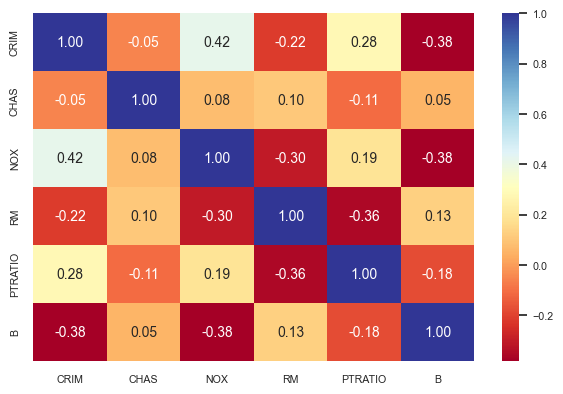

In [29]:
# 3.변수간 상관관계 그래프로 나타내기
corr = df[cols].corr(method='pearson')
print(f'상관계수: {corr}')

#상관계수를 Heatmap으로 표현 
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

                     
import seaborn as sns

sns.set(font_scale=0.7)  # heatmap안의 font-size

heatmap = sns.heatmap(corr.values, annot=True, fmt='.2f',annot_kws={'size':10},
                     yticklabels=cols, xticklabels=cols, ax=ax, cmap='RdYlBu')
plt.tight_layout()
plt.show()

-------

#### #상관계수 참고용 그림

In [25]:
# 인터넷에 있는 이미지 보여주기
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png'
           , width=400, height=300)

In [28]:
Image(url='https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg'
     , width=400, height=300)

-------------------------------------

## 1. Matplotlib 기본 설정
- **한글 폰트** 사용 : 전체 사용 설정, 특정 부분사용 설정
- **그래프 크기** 설정 : 
- **그래프 스타일** 설정 : plt.style.use(style-name)  


###  한글 폰트 사용
- [주의] 윈도우에서 사용하는 방법 설명함

In [4]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list.sort()
font_list

['Adobe Gothic Std',
 'Agency FB',
 'Agency FB',
 'Algerian',
 'Ami R',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial',
 'Arial Rounded MT Bold',
 'Bahnschrift',
 'Baskerville Old Face',
 'Batang',
 'Bauhaus 93',
 'Bell MT',
 'Bell MT',
 'Bell MT',
 'Berlin Sans FB',
 'Berlin Sans FB',
 'Berlin Sans FB Demi',
 'Bernard MT Condensed',
 'Binggrae',
 'Binggrae',
 'Binggrae Taom',
 'Binggrae Taom',
 'Binggrae?',
 'Binggrae?',
 'Blackadder ITC',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Bodoni MT',
 'Book Antiqua',
 'Book Antiqua',
 'Book Antiqua',
 'Book Antiqua',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookman Old Style',
 'Bookshelf Symbol 7',
 'Bradley Hand ITC',
 'Britannic Bold',
 'Broadway',
 'Brush Script MT',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Calibri',
 'Californian FB',
 'Californian FB

In [31]:
import matplotlib.pyplot as plt

# 현재  폰트 조회
print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])

# 사용 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 15

plt.rc("font", family = "Malgun Gothic")

# 그래프 축에서 마이너스 표시
plt.rcParams['axes.unicode_minus'] = False

['sans-serif']
8.399999999999999


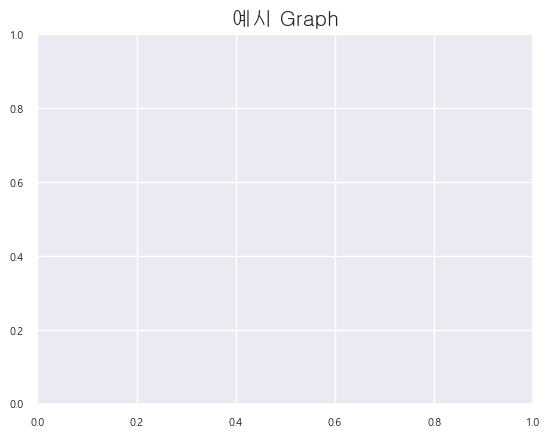

In [32]:
# 특정 부분 사용 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:\Windows\Fonts\gulim.ttc'
fontprop = fm.FontProperties(fname=path)
plt.title('예시 Graph', fontproperties=fontprop)
plt.show()

### 그래프 크기 설정

#### - 전체 적용

In [9]:
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시
plt.rcParams['figure.figsize'] = (6, 4)  # (가로,세로) 인치 단위

plt.rcParams['lines.linewidth'] = 2   # 선 두께
plt.rcParams['lines.color'] = 'r'     # 선 색깔
plt.rcParams['axes.grid'] = True      # 차트 내 격자 표시

#### - 부분 적용

In [10]:
plt.figure(figsize=(6,4))
# fig = plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

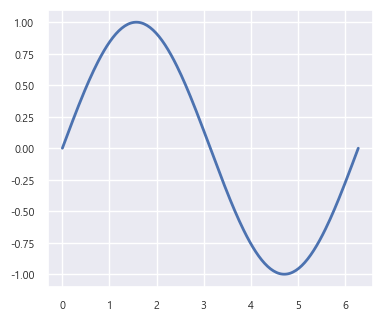

In [11]:
import numpy as np

X = np.linspace(0, 2*np.pi, 200)
Y = np.sin(X)
plt.figure(figsize=(4.2, 3.6))
plt.plot(X, Y)
plt.show()

###  그래프 스타일 설정

#### - 그래프 배경 스타일 설정
- plt.style.use(style-name)
- 예: plt.style.use('seaborn')
> - default, classic, grayscale ggplot, seaborn, dark_background  
> - fast, bmh, Solarize_Light2, seaborn-notebook, seaborn-whitegrid

In [12]:
plt.style.use('default')
# plt.style.use('dark_background')

#### - 그리드 설정

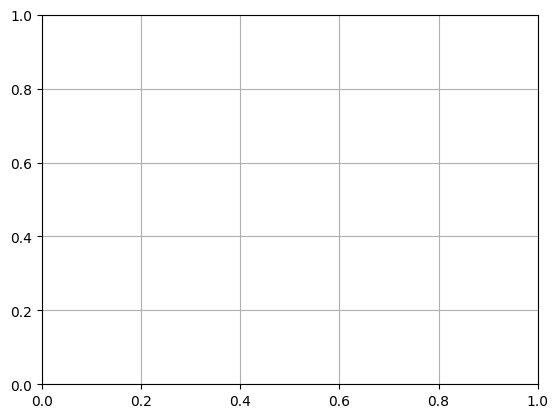

In [13]:
plt.grid()

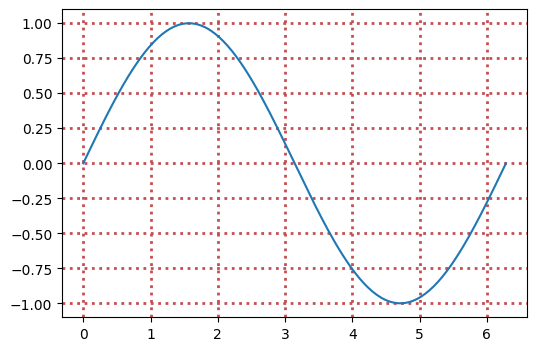

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(X, Y)
plt.grid(color='r', linestyle='dotted', linewidth=2)
# plt.grid(axis='x', color='r', linestyle='dotted', linewidth=2)
# plt.grid(axis='y', color='r', linestyle='dotted', linewidth=2)
plt.show()

### Matplotlib 기본 참고 사이트

#### - 그래프 예제
- https://matplotlib.org/stable/gallery/index.html
    
#### - Linestyles(선 스타일과 소스 코드 포함)
- https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html?highlight=linestyle 


#### - Colors(튜토리얼 및 예시와 소스 코드 포함
- https://matplotlib.org/stable/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py 

#### - matplotlib.markers(마커와 소스 코드 포함)
- https://matplotlib.org/stable/api/markers_api.html?highlight=marker#module-matplotlib.markers 

#### - Colormap(컬러맵) 
- https://matplotlib.org/tutorials/colors/colormaps.html 

----------

## 2. 기본 그래프
- https://matplotlib.org/stable/api/pyplot_summary.html?highlight=pyplot%20style%20use%20style%20name 


### 선(plot)그래프 나타내기
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
- **matplotlib.pyplot.plot**(*args, scalex=True, scaley=True, data=None, **kwargs)

['Malgun Gothic']
10.0


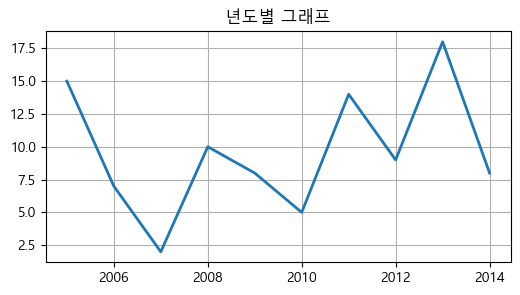

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# 현재 전체 폰트 조회
print(plt.rcParams['font.family'])
print(plt.rcParams['font.size'])

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 3) # 그래프(figure)의 크기, (가로,세로) 인치 단위
plt.rcParams['lines.linewidth'] = 2      # 선 두께
plt.rcParams['axes.grid'] = True 

#plt.style.use('default')

columns = list(range(2005,2015,1))
data    = [[15,7,2,10,8,5,14,9,18,8]]  
index   = ['횟수']

df = pd.DataFrame(data, columns=columns, index=index)
df.columns.name = '연도'

x = df.columns    #x = df.columns
y = df.values[0]  #y = df.values[0]

plt.plot(x, y)
#plt.plot(x, y, 'o', linestyle='dashed', c='b')
plt.title('년도별 그래프')
plt.show()

### [실습] : 2개 선그래프 나타내기

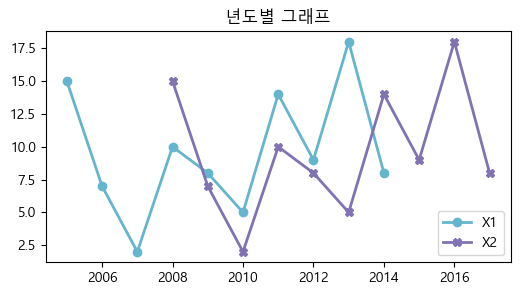

In [17]:
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 3)  # (가로,세로) 인치 단위

# X축, Y축 데이터
X1 = list(range(2005,2015,1))
X2 = list(range(2008,2018,1))
Y = [15,7,2,10,8,5,14,9,18,8]

plt.plot(X1, Y, 'o', linestyle='solid', c='c', label='X1')     #선 그래프
plt.plot(X2, Y, 'X', linestyle='solid', c='m', label='X2')     #선 그래프
plt.title('년도별 그래프')
plt.grid(False)
plt.legend()
plt.show()

### 선 그래프 : numpy 데이터

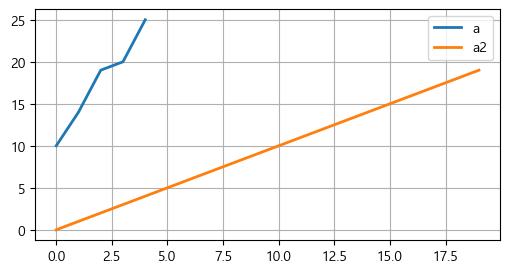

In [18]:
import matplotlib.pyplot as plt
import numpy as np

a = np.array([10,14,19,20,25])
plt.plot(a, label='a')

a2 = np.arange(20)
plt.plot(a2, label='a2')

plt.legend()
plt.show() 

### 2차 방정식의 그래프 : f(x) = a*x^2 + b, 포물선 방정식

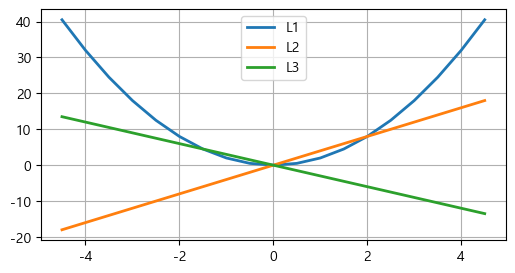

In [19]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-4.5,5,0.5)
y = 2*x**2
plt.plot(x, y, label='L1')
plt.plot(x, 4*x, label='L2')
plt.plot(x,-3*x, label='L3')
plt.legend()
plt.show()

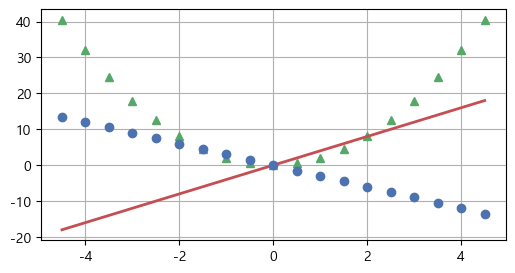

In [20]:
x = np.arange(-4.5,5,0.5)
y1 = 2*x**2
y2 = 4*x
y3 = -3*x
plt.plot(x, y1, 'g^', x, y2, 'r-', x, y3, 'bo')
plt.show()

--------

### 점(scatter) 그래프 나타내기
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- **matplotlib.pyplot.scatter**(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs)[source]

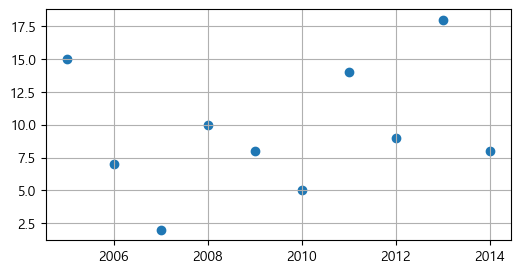

In [21]:
import matplotlib.pyplot as plt

x = list(range(2005,2015,1))
y  = [15,7,2,10,8,5,14,9,18,8]

plt.scatter(x, y)
plt.show()

#### - 점 크기 지정

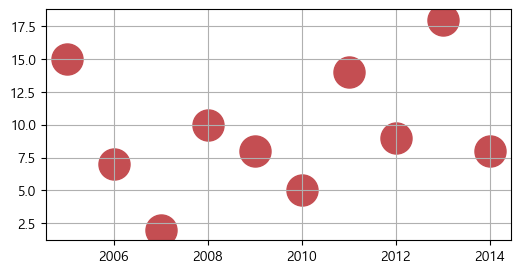

In [22]:
plt.scatter(x, y,  s=500, c='r')  # s:마커크기: 500, 컬러:red 
# for x, y in zip(X, Y):     
#     plt.text(x, y, str(y), fontsize=10, 
#              horizontalalignment='center', verticalalignment='center')  # x,y좌표에 글자 넣기
plt.show()

#### - 점 크기, 색상, 투명도 지정

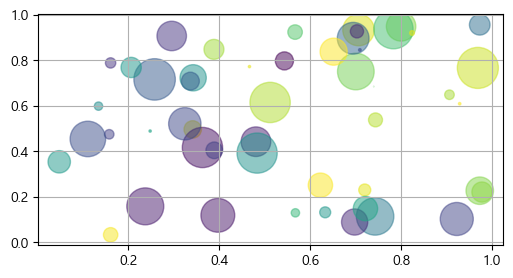

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

#### - Hyperlink 적용된 이미지로 표현하기
- [주의] graph 디렉토리를 만든 후에 실행한다. C:\python\dataAnalysis\graph
- https://matplotlib.org/stable/gallery/misc/hyperlinks_sgskip.html#sphx-glr-gallery-misc-hyperlinks-sgskip-py

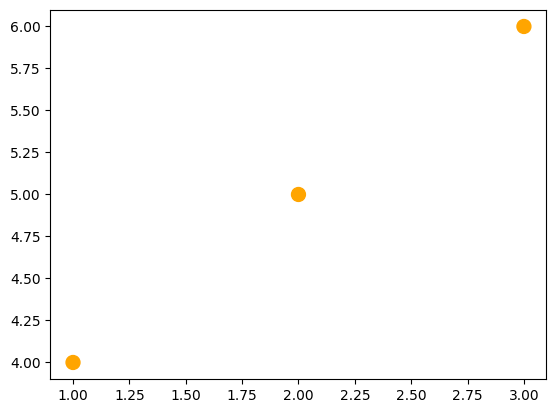

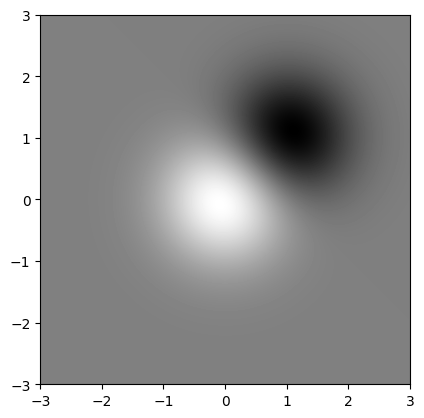

In [40]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig = plt.figure()
s = plt.scatter([1, 2, 3], [4, 5, 6], s=100, c='orange')
s.set_urls(['https://www.bbc.co.uk/news', 'https://www.google.com/', None])
fig.savefig('image/scatter.svg')

fig = plt.figure()
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2
#print(Z)

im = plt.imshow(Z, interpolation='bilinear', cmap=cm.gray,
                origin='lower', extent=[-3, 3, -3, 3])

im.set_url('https://www.google.com/')
fig.savefig('image/image.svg')

dict_values(['https://www.bbc.co.uk/news', 'https://www.google.com/', None])


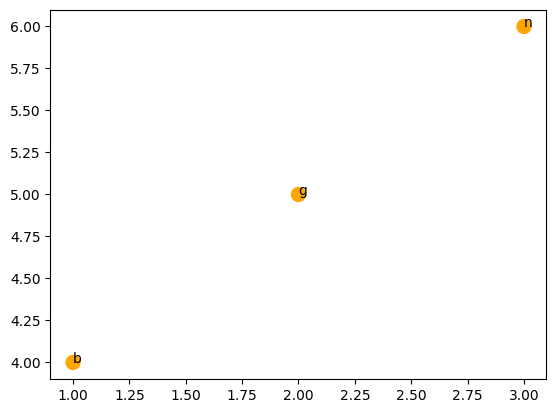

In [55]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

fig = plt.figure()
X, Y = [1, 2, 3], [4, 5, 6]
urls = {1: 'bbc',
        2: 'google',
        3: 'none'}
urls_link = {'bbc':'https://www.bbc.co.uk/news',
            'google':'https://www.google.com/',
            'none':None}
s = plt.scatter(X, Y, s=100, c='orange') 
for idx, val in enumerate(zip([1, 2, 3], [4, 5, 6])):
    plt.text(val[0], val[1], urls[idx+1][0])

# s = plt.scatter(X, Y, s=100, c='orange')    
print(urls_link.values())
s.set_urls(list(urls_link.values()))
fig.savefig('image/scatter.svg')


### [실습]  날씨 데이터 읽어서 Scatter 그래프로 나타내기 

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글, 그래프 크기 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
plt.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시
plt.rcParams['figure.figsize'] = [10, 6]  

# 1.데이터 불러오기 -----------------------
file = 'data/weather_total.csv'
df = pd.read_csv(file, encoding='CP949', engine='python')

df.head()

,일시,평균기온(°C),평균 상대습도(%),평균 전운량(1/10),합계 일조 시간(hr),강수 계속시간(hr),구분
0,2010-01-01,-7.6,48.0,3.8,7.3,NaN,0
1,2010-01-02,-3.6,76.4,6.0,0.8,6.57,1
2,2010-01-03,-6.8,49.3,2.6,8.2,NaN,0
3,2010-01-04,-5.9,84.1,7.5,0.1,13.03,1
4,2010-01-05,-9.9,66.4,2.1,7.5,0.95,1


In [58]:
# 컬럼 삭제
if 'Unnamed: 0' in df.columns: 
    df.drop(['Unnamed: 0'], axis = 1, inplace = True)

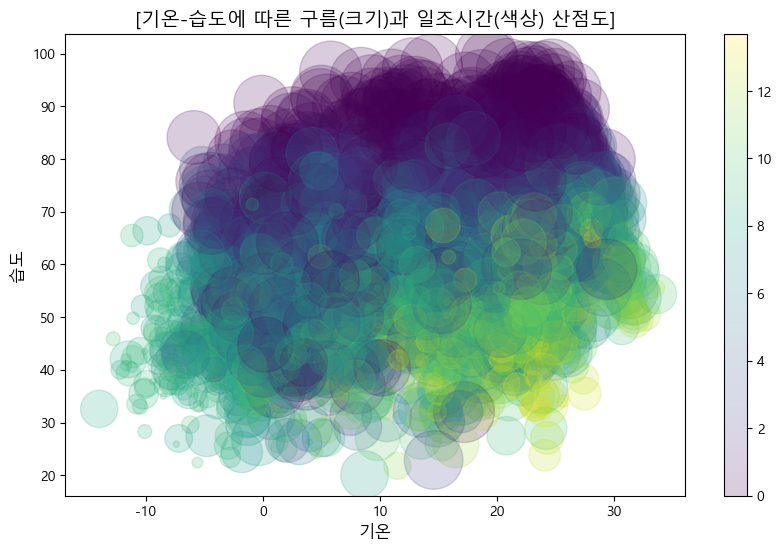

In [60]:
# 컬럼명 변경
df.columns = ['일시', '기온', '습도', '구름량',
       '일조시간', '강수시간', '구분']


# 2. 특정기간 데이터 추출하기 --------------
# df = df.query(" 일시.str.contains('2011') ")


# 3. 그래프 그리기  -----------------------
plt.scatter(df['기온'], # X좌표
            df['습도'], # Y좌표
            alpha=0.2, # 투명도 
#             s=200*df['구름량'], # marker size
#             c=df['일조시간'],   # marker color
            cmap='viridis' ) 
plt.xlabel('기온', fontsize=12)
plt.ylabel('습도', fontsize=12)
plt.colorbar()


# # 4.비가 온 날 그래프에 함께 표시하기 ------
# df2 = df.query(" 일시.str.contains('2011') and 구분 == 1.0 ")

# plt.scatter(df['기온'], # X좌표
#             df['습도'], # Y좌표
#             c=df['구분'])  # marker color       
# # plt.xlabel('기온', fontsize=12)
# # plt.ylabel('습도', fontsize=12)
# plt.colorbar()

plt.title("[기온-습도에 따른 구름(크기)과 일조시간(색상) 산점도]", fontsize=14)
plt.show()

-------

### 막대(bar) 그래프 나타내기

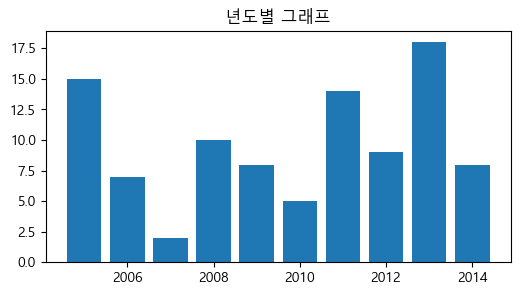

In [61]:
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   

# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 3)  # (가로,세로) 인치 단위

# X축, Y축 데이터
X = list(range(2005,2015,1))
Y = [15,7,2,10,8,5,14,9,18,8]

plt.bar(X, Y)     # 막대 그래프
plt.grid(False)
plt.title('년도별 그래프')
plt.show()

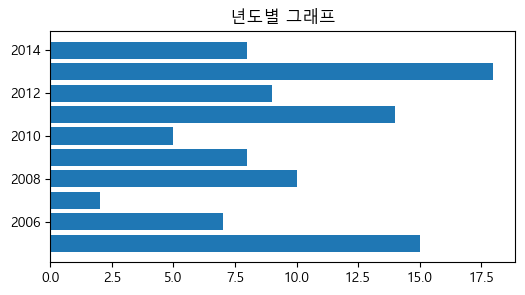

In [62]:
plt.barh(X, Y)     # 막대 그래프
plt.grid(False)
plt.title('년도별 그래프')
plt.show()

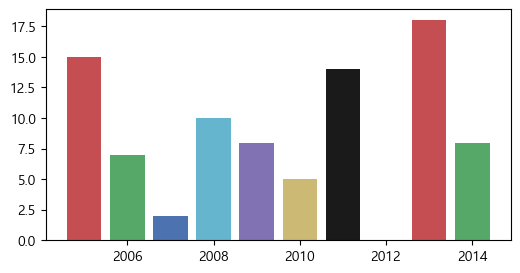

In [63]:
#그래프 색상 지정
colors = ['r','g','b','c','m','y','k','w']  # 기본색상  # Hexa코드 or CSS컬러사용
plt.bar(X, Y,color=colors)
plt.show()

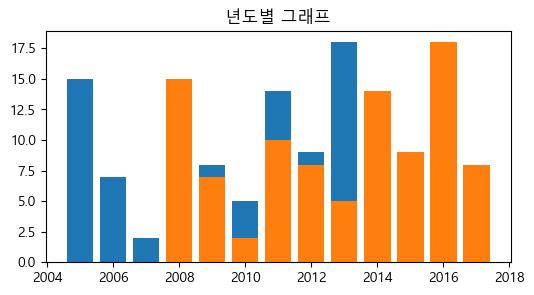

In [64]:
import matplotlib.pyplot as plt

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 3)  # (가로,세로) 인치 단위

# X축, Y축 데이터
X1 = list(range(2005,2015,1))
X2 = [x+3 for x in X1]
Y = [15,7,2,10,8,5,14,9,18,8]

plt.bar(X1, Y)     # 막대 그래프
plt.bar(X2, Y)     # 막대 그래프
plt.title('년도별 그래프')
plt.grid(False)
plt.show()

### 2개 막대 그래프

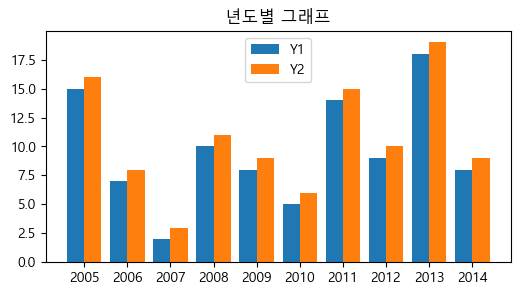

In [65]:
import matplotlib.pyplot as plt
import numpy as np

# 한글출력 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = (6, 3)  

# X축, Y축 데이터
X = list(range(2005,2015,1))
Y1= [15,7,2,10,8,5,14,9,18,8]
Y2= [y+1 for y in Y1]
lable = X
X = np.arange(len(X))

plt.bar(X-0.2, Y1, width=0.4, label='Y1')     # 막대 그래프
plt.bar(X+0.2, Y2, width=0.4, label='Y2')     # 막대 그래프
plt.xticks(X, lable)

plt.title('년도별 그래프')
plt.grid(False)
plt.legend()
plt.show()

### 혼합 그래프(막대 + 선)

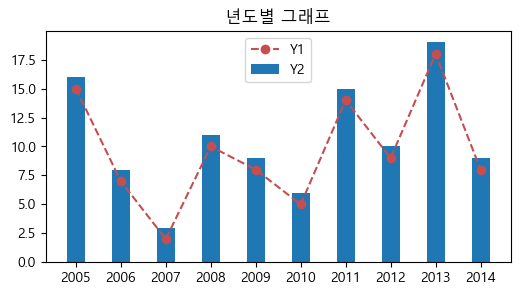

In [66]:
# X축, Y축 데이터
X = list(range(2005,2015,1))
Y1= [15,7,2,10,8,5,14,9,18,8]
Y2= [y+1 for y in Y1]

plt.plot(X, Y1, 'o', linestyle='dashed', c='r', label='Y1') # 선 그래프
plt.bar(X, Y2, width=0.4, label='Y2')     # 막대 그래프
plt.xticks(X, lable)

plt.title('년도별 그래프')
plt.grid(False)
plt.legend()
plt.show()

### [실습] 막대 그래프 표현하기

In [73]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 한글출력 설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False     # 그래프에서 (-)숫자표시
# 그래프 크기 설정
plt.rcParams['figure.figsize'] = [8, 4] # setting figure siz


# 1.데이터 불러오기 -----------------------
file = 'data/weather_total.csv'
df = pd.read_csv(file, encoding='CP949', engine='python')

# 컬럼명 변경
df.columns = ['일시', '기온', '습도', '구름량',
       '일조시간', '강수시간', '구분']

# 2. 년도 컬럼 추가
tmp = pd.to_datetime(df['일시'])
df['년도'] = tmp.dt.year

# 3. 년도별 평균 구하기
df2 = df.groupby(['년도'], as_index=False).mean()
df2

# 년도별 일조기간 평균 구하기
# df['일조시간'].groupby(df['년도']).mean()

,년도,기온,습도,구름량,일조시간,강수시간,구분
0,2010,12.140822,62.982740,5.206575,5.083014,5.474294,0.446575
1,2011,12.082192,59.536712,5.026849,5.697253,6.618699,0.400000
2,2012,12.268579,56.703279,4.827049,6.575410,5.743517,0.396175
3,2013,12.563562,60.060000,4.868219,6.626575,5.202387,0.424658
4,2014,13.400274,62.885753,4.656164,6.663836,5.141269,0.367123
...,...,...,...,...,...,...,...
6,2016,13.592896,59.147268,4.848907,6.824590,4.861268,0.387978
7,2017,13.073151,57.728493,4.585205,7.239722,5.087639,0.394521
8,2018,13.002466,57.474521,4.748767,7.148753,6.731641,0.350685
9,2019,13.598904,56.806301,4.899178,NaN,5.653597,0.380822


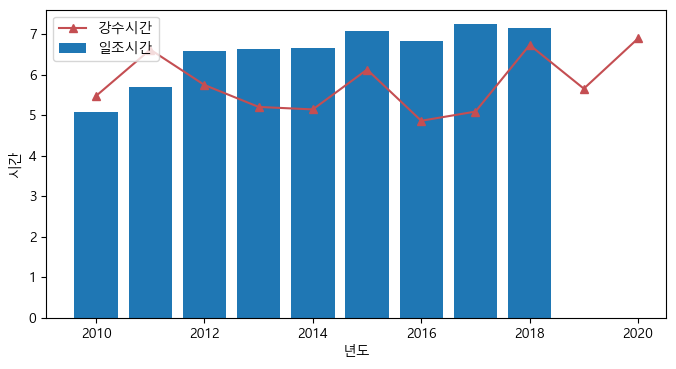

In [70]:
# 4. 년도별 일조시간, 강수시간
X  = df2['년도']
Y1 = df2['일조시간']
Y2 = df2['강수시간']

# 5. 막대 그래프 그리기
plt.bar(X, Y1, label='일조시간')
plt.plot(X, Y2, 'r^', linestyle='solid', label='강수시간')
plt.xlabel('년도')
plt.ylabel('시간')
plt.legend()
plt.show()

--------

-------

## 원(Pie) 그래프
- 범주형 데이터들이 가지는 전체적인 비율을 한눈에 보고자 할 때 사용

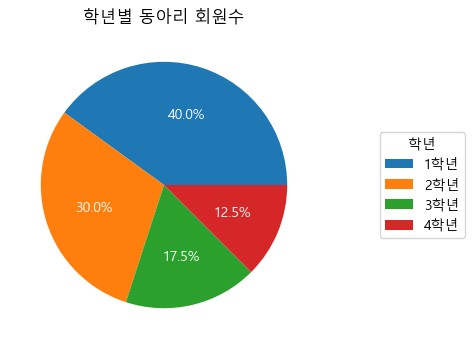

In [74]:
import matplotlib.pyplot as plt 
import pandas as pd

idx = ['1학년','2학년','3학년','4학년']
val = [16,12,7,5]
per = [val[x]/sum(val) *100 for x in range(len(val))]

plt.pie(per, autopct='%1.1f%%', textprops=dict(color="w"))

plt.title("학년별 동아리 회원수")
plt.legend(idx, title='학년', loc="center right", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()


#### - Data:  X축, Y축 데이터 (년도별 3.0이상 강진 횟수)

In [75]:
x = list(range(2005,2015,1))
y  = [15,7,2,10,8,5,14,9,18,8]

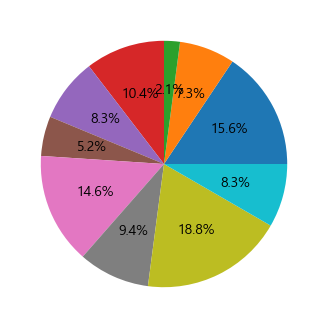

In [76]:
plt.pie(y, autopct='%.1f%%')
plt.show()

#### - 레이블 보여주기

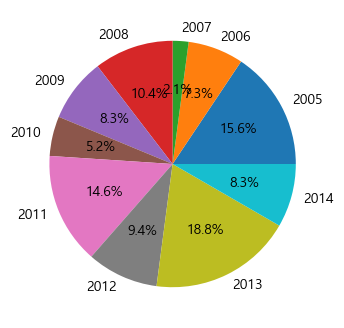

In [77]:
plt.pie(y, labels=x, autopct='%.1f%%')
plt.show()

#### - 제목과 범례 표시

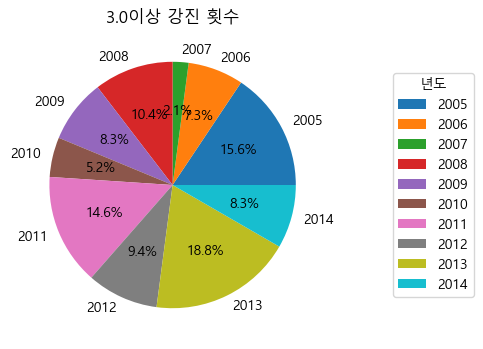

In [78]:
plt.pie(y, labels=x,  autopct='%1.1f%%')
plt.legend(x, title='년도', loc="center right",  bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("3.0이상 강진 횟수")
plt.show()

#### - 글씨 크기&색상 조정
- 단, textprops 옵션 중 color를 사용하면 labels=x 이 표시되지 않는다.

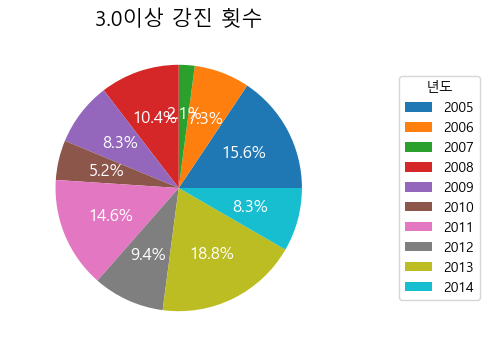

In [79]:
plt.pie(y, labels=x, autopct='%1.1f%%', textprops={'size':12, 'color':'w'})
plt.legend(x, title='년도', loc="center right",  bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("3.0이상 강진 횟수", size=15)
plt.show()

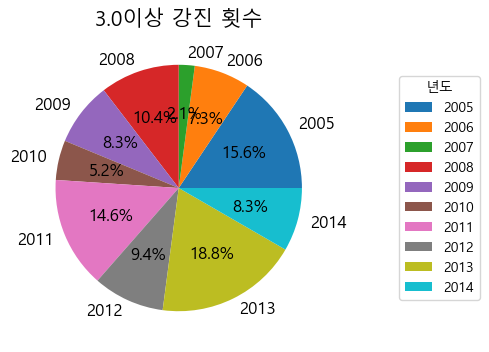

In [80]:
plt.pie(y, labels=x, autopct='%1.1f%%', textprops={'size':12})
plt.legend(x, title='년도', loc="center right",  bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("3.0이상 강진 횟수", size=15)
plt.show()

#### - 조각이 모두 분리되도록 표시

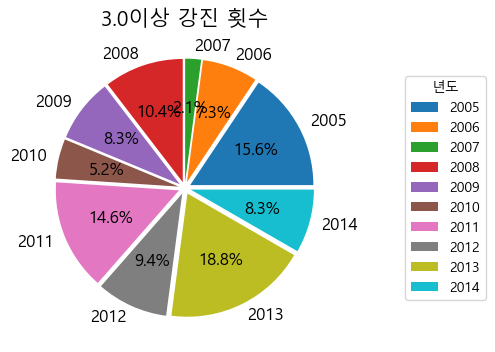

In [81]:
x = list(range(2005,2015,1))
y  = [15,7,2,10,8,5,14,9,18,8]

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05) #조각이 돌출되도록 표현


plt.pie(y, labels=x, autopct='%1.1f%%', textprops={'size':12}, explode=explode)
plt.legend(x, title='년도', loc="center right",  bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("3.0이상 강진 횟수", size=15)
plt.show()


#### - 특정 조각이 돌출되도록 표시

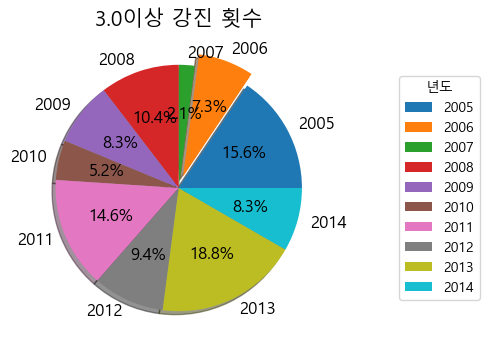

In [82]:
explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0) #조각이 돌출되도록 표현

plt.pie(y, labels=x, autopct='%1.1f%%', textprops={'size':12},
        explode=explode, shadow=True, startangle=0)
plt.legend(x, title='년도', loc="center right",  bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("3.0이상 강진 횟수", size=15)
plt.show()

-------

## 3. subplot()을 이용한 그래프 배치

### subplot()으로 그래프 여러개 표현하기

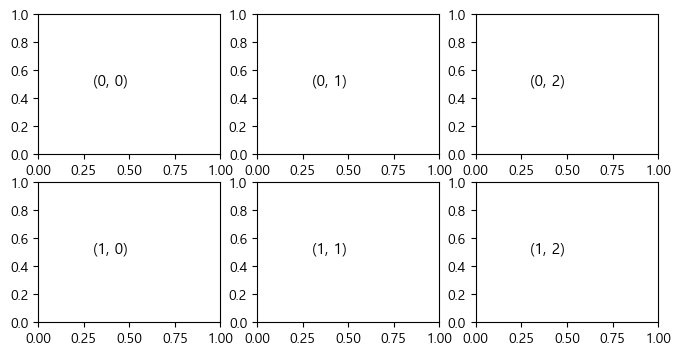

In [83]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3)

for i in range(2):      # 2행
    for j in range(3):  # 3열
        # 텍스트만 표시
        ax[i, j].text(0.3, 0.5, str((i,j)), fontsize=11)  

### 공간 병합하여 그래프 배치하기

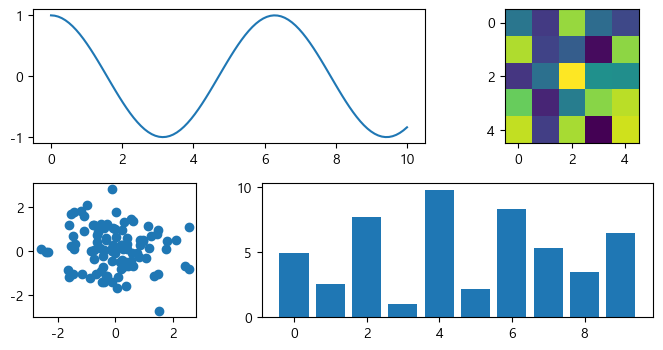

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 공간 설정
#fig, ax = plt.subplots(2,3)      # 2행 2열 그래프 공간

# 공간을 합병하기 위한 GridSpec 클래스 사용
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)


# 선 그래프
X = np.linspace(0, 10, 100)      # 0~10사이의 선형 분포 100개 
Y = np.cos(X)                    # X의 코사인 값
#ax[0,0].plot(X, Y)              # 선 그래프
plt.subplot(grid[0, :2]).plot(X, Y)               

# 분포를 2D 이미지 그림으로
Z = np.random.uniform(0,1,(5,5)) # 0~1사이의 균일분포값을 5행x5열
#ax[1,1].imshow(Z)                # 2D 이미지 그림으로 표현
plt.subplot(grid[0, 2]).imshow(Z)

# 점 그래프
X = np.random.randn(100)         # 정규 분포를 가지는 데이터
Y = np.random.randn(100)         # 정규 분포를 가지는 데이터
#ax[1,0].scatter(X, Y)
plt.subplot(grid[1, 0]).scatter(X, Y)

# 막대 그래프
X = np.arange(10)                # 0~9사이의 연속값
Y = np.random.uniform(1,10,10)   # 균일분포값 생성
#ax[0,1].bar(X, Y)                # 막대 그래프
plt.subplot(grid[1, 1:]).bar(X, Y)

plt.show()

### [실습] subplot()을 이용하여 그래프를 분리해 주세요.

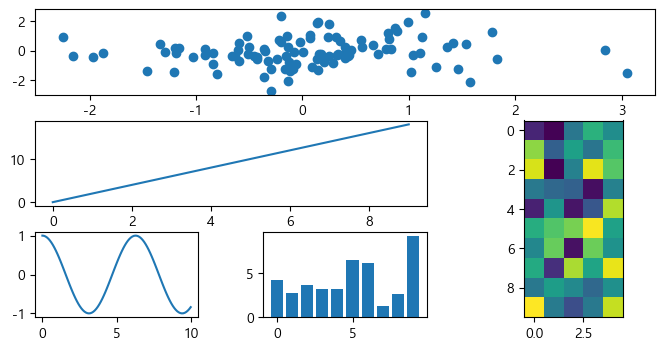

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 공간 설정
#fig, ax = plt.subplots(2,3)      # 2행 2열 그래프 공간

# 공간을 합병하기 위한 GridSpec 클래스 사용
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.3)


# 점 그래프
X = np.random.randn(100)         # 정규 분포를 가지는 데이터
Y = np.random.randn(100)         # 정규 분포를 가지는 데이터
#ax[1,0].scatter(X, Y)
plt.subplot(grid[0, :]).scatter(X, Y)

# 선 그래프
X = np.arange(0, 10)
Y = 2*X
plt.subplot(grid[1, :2]).plot(X, Y)

# 선 그래프
X = np.linspace(0, 10, 100)      # 0~10사이의 선형 분포 100개 
Y = np.cos(X)                    # X의 코사인 값
#ax[0,0].plot(X, Y)              # 선 그래프
plt.subplot(grid[2, 0]).plot(X, Y)               

# 막대 그래프
X = np.arange(10)                # 0~9사이의 연속값
Y = np.random.uniform(1,10,10)   # 균일분포값 생성
#ax[0,1].bar(X, Y)                # 막대 그래프
plt.subplot(grid[2, 1]).bar(X, Y)

# 분포를 2D 이미지 그림으로
Z = np.random.uniform(0,1,(10,5)) # 0~1사이의 균일분포값을 5행x5열
#ax[1,1].imshow(Z)                # 2D 이미지 그림으로 표현
plt.subplot(grid[1:, -1]).imshow(Z)

plt.show()

--------

## 3. 다양한 그래프

### 이미지 파일 matplotlib 그래프에 나타내기(imshow)

#### - matplotlib 그래프에 이미지 파일 나타내기

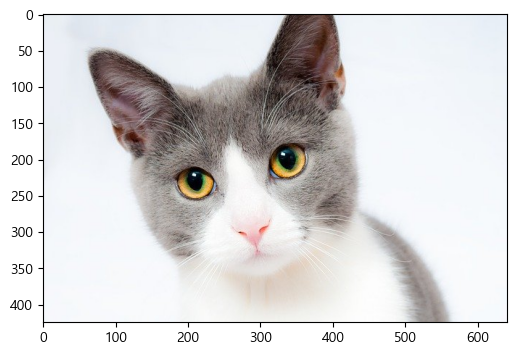

In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as img

img_test = img.imread('image/cat.jpg')
plt.imshow(img_test) 
plt.grid(False)
plt.show()

#### - OpenCV로 이미지 파일을 읽어와 matplotlib 그래프에 나타내기

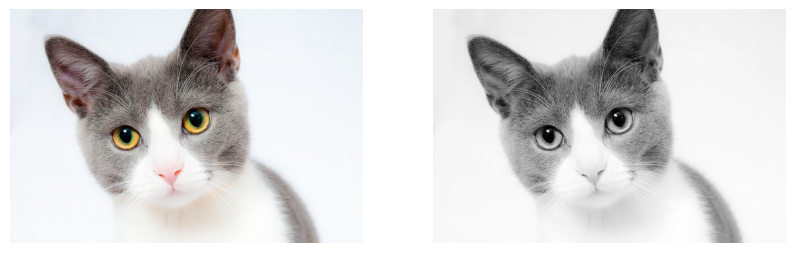

In [87]:
import cv2
import matplotlib.pyplot as plt

# 컬러 영상 & 그레이스케일 영상 불러오기
img1 = cv2.imread('image/cat.jpg', cv2.IMREAD_COLOR) 
img2 = cv2.imread('image/cat.jpg', cv2.IMREAD_GRAYSCALE)

# matplotlib출력을 위해 RGB 순서로 변환
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 

# 두 개의 영상을 함께 출력
plt.figure(figsize=(10, 5)) #그래프 크기(인치)
plt.subplot(121), plt.axis('off'), plt.imshow(img1_rgb)
plt.subplot(122), plt.axis('off'), plt.imshow(img2, cmap='gray')
plt.show()

### 히스토그램 그래프
- 주어진 자료를 몇 개의 구간으로 나누고 각 구간의 도수(frequency)를 조사하여 나타낸 막대 그래프

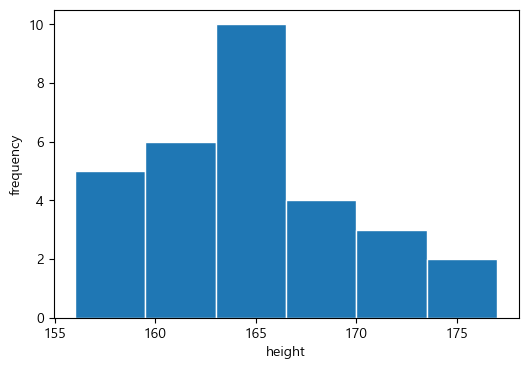

In [89]:
plt.figure(figsize=(6,4))
heights = np.array([175,165,164,164,171,165,160,169,164,159,
                    163,167,163,172,159,160,156,162,166,162,
                    158,167,160,161,156,172,168,165,165,177])
plt.hist(heights, bins=6, edgecolor='w')  # 히스토그램 구간
plt.xlabel('height')
plt.ylabel('frequency')
plt.show()

#### - 누적 히스토그램 그리기

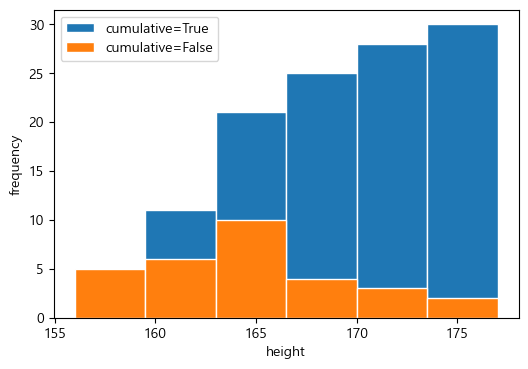

In [90]:
plt.figure(figsize=(6,4))
plt.hist(heights, bins=6, cumulative=True, 
         edgecolor='w', label='cumulative=True') 
plt.hist(heights, bins=6, cumulative=False,
         edgecolor='w', label='cumulative=False') 
plt.xlabel('height')
plt.ylabel('frequency')
plt.legend(loc='upper left')
plt.show()

### [실습] 공간 병합하여 히스토그램 그래프 나타내기
Numpy random모듈의 정규분포 함수를 이용하여 data1 = N(0, 1) , data2 = N(3, 0.51)인 데이터를 각각 1000개 만들고 히스토그램으로 나타내기

#### - 정규 분포 함수를 이용한 히스토그램 그리기

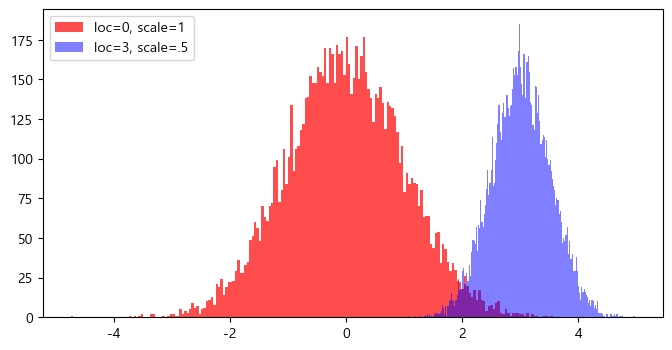

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# 표준 정규분포 (평균0, 분산1)
data1 = np.random.normal(loc=0, scale=1, size=10000)   # (평균 0, 분산 1)
data2 = np.random.normal(loc=3, scale=.51, size=10000) # (평균 3, 분산 0.5)

plt.hist(data1, bins=200, color='red', 
         alpha=.7, label='loc=0, scale=1')
plt.hist(data2, bins=200, color='blue', 
         alpha=.5, label='loc=3, scale=.5')

plt.legend()
plt.show()


#### - 공간 병합하여 히스토그램 그래프 나타내기

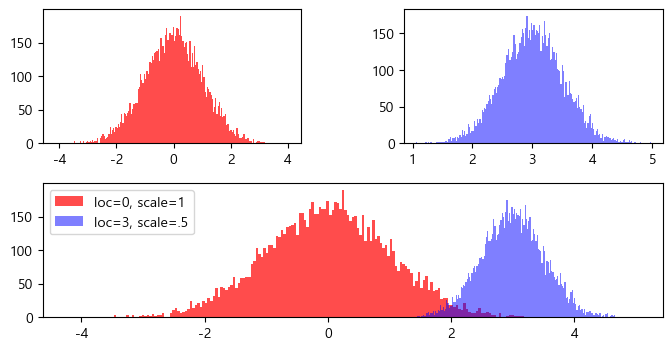

In [92]:
import matplotlib.pyplot as plt
import numpy as np

# 표준 정규분포 (평균0, 분산1)
data1 = np.random.normal(loc=0, scale=1, size=10000)   # (평균 0, 분산 1)
data2 = np.random.normal(loc=3, scale=.51, size=10000) # (평균 3, 분산 0.5)


# 공간을 합병하기 위한 GridSpec 클래스 사용
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)

# red 히스토그램
plt.subplot(grid[0, 0]).hist(data1, bins=200, 
                             color='red', alpha=.7)


# blue 히스토그램
plt.subplot(grid[0, 1]).hist(data2, bins=200, 
                             color='blue', alpha=.5)

# all 히스토그램
plt.subplot(grid[1, :]).hist(data1, bins=200, color='red', 
                             alpha=.7, label='loc=0, scale=1')
plt.subplot(grid[1, :]).hist(data2, bins=200, color='blue', 
                             alpha=.5, label='loc=3, scale=.5')
plt.legend()
plt.show()

### [참고]  scipy.stats를 이용하여 확률 밀도 함수 그리기
- 확률 밀도 함수 : 연속적으로 나타나는 변수의 분포인 연속 확률 분포를 표현한 함수
- 예: 학생들의 키를 확률변수 X라고 할때 키 값의 분포는 연속적이며, 이 분포를 Y축에 나타내어 그릴 경우 종 모양의 확률 밀도 함수 형태가 된다.

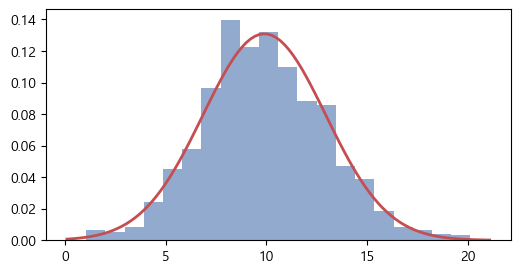

In [93]:
from scipy.stats import norm

plt.figure(figsize=(6,3))

# 평균이 10, 분산이 3인 1000개 데이터 생성
data = norm.rvs(10, 3, size=1000)
plt.hist(data, bins=20, density=True, alpha=0.6, color='b')

# 정규 분포를 데이터에 피팅함
mu, std = norm.fit(data)

# scipy pdf는 평균, 표준편차로부터 확률 밀도 함수를 생성함
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)   # 확률
plt.plot(x, p, 'r', linewidth=2)
plt.show()

### 히트맵(Heatmap)
- 데이터 값이 클 경우 또는 작을 경우에 대해어 서로 다른 색상을 사용하여 데이터 분포를 쉽게 이해할 수 있도록 함
- 상관관계 분석에 자주 사용됨

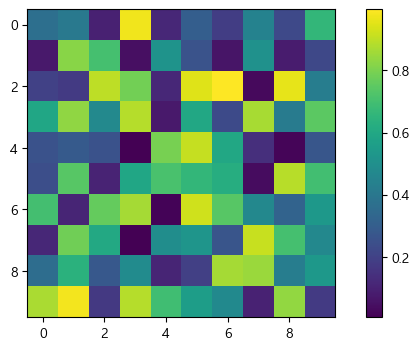

In [94]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.random((10, 10))  # 10x10 행렬
plt.imshow(data, cmap='viridis')
plt.colorbar()

plt.show()

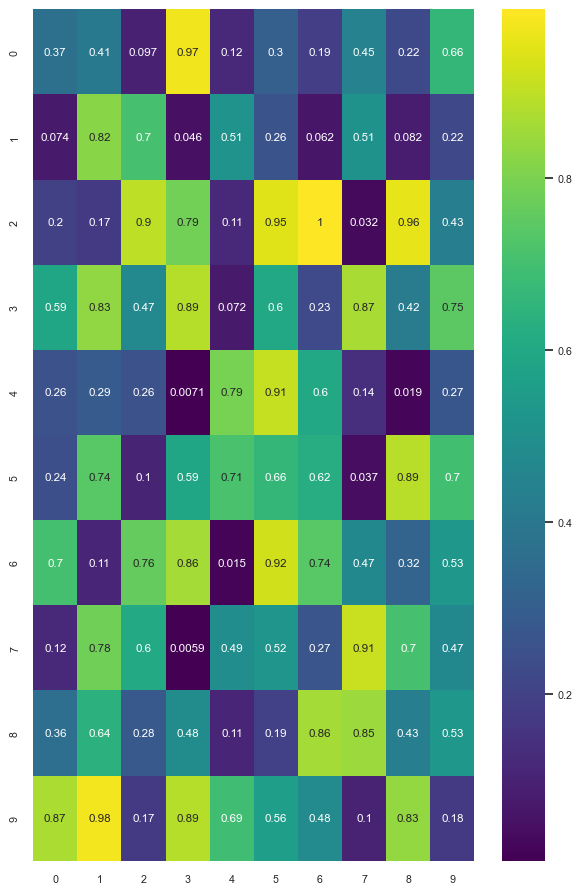

In [95]:
import seaborn as sns

plt.figure(figsize=(6, 9))

sns.set(font_scale=0.7)  # heatmap안의 font-size
heatmap = sns.heatmap(data, annot=True, cmap='viridis') 
plt.tight_layout()
plt.show()

### [실습] 농부의 수확량 히트맵으로 나타내기
Numpy random모듈의 정규분포 함수를 이용하여 data1 = N(0, 1) , data2 = N(3, 0.51)인 데이터를 각각 1000개 만들고 히스토그램으로 나타내기

In [96]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(6, 4))

# 데이터 
vegetables = ["cucumber", "tomato", "lettuce",
              "asparagus", "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", 
           "Cornylee Corp."]
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])

# DataFrame으로 나타내기
df = pd.DataFrame(harvest, columns=farmers, index=vegetables)
df



,Farmer Joe,Upland Bros.,Smith Gardening,Agrifun,Organiculture,BioGoods Ltd.,Cornylee Corp.
cucumber,0.8,2.4,2.5,3.9,0.0,4.0,0.0
tomato,2.4,0.0,4.0,1.0,2.7,0.0,0.0
lettuce,1.1,2.4,0.8,4.3,1.9,4.4,0.0
asparagus,0.6,0.0,0.3,0.0,3.1,0.0,0.0
potato,0.7,1.7,0.6,2.6,2.2,6.2,0.0
wheat,1.3,1.2,0.0,0.0,0.0,3.2,5.1
barley,0.1,2.0,0.0,1.4,0.0,1.9,6.3


<Figure size 600x400 with 0 Axes>

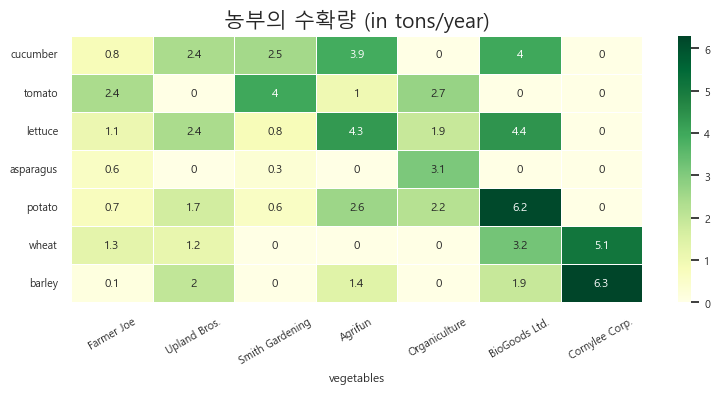

In [97]:
# 히트맵으로 나타내기
plt.title("농부의 수확량 (in tons/year)", fontsize=15)
sns.heatmap(df, vmin=np.min(harvest), vmax=np.max(harvest), 
            annot=True, linewidths=0.5, cmap='YlGn') # cmap="viridis"
plt.xlabel('farmers')
plt.xlabel('vegetables')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 상자 차트(Boxplot) 그래프
- 사분위수를 이용하여 수집한 자료에 포함된 특이값을 알려주는 그림
- 자료의 중시위치와 흩어진 모양 그리고 분포의 꼬리부분을 쉽게 파악할 수 있다.
- 상자그림은 두 개 이상의 자료 집단을 비교할 때 유용하다.중심위치

Q1: 26, Q: 38, Q3: 41, Q4: 70
중앙값: 38.0


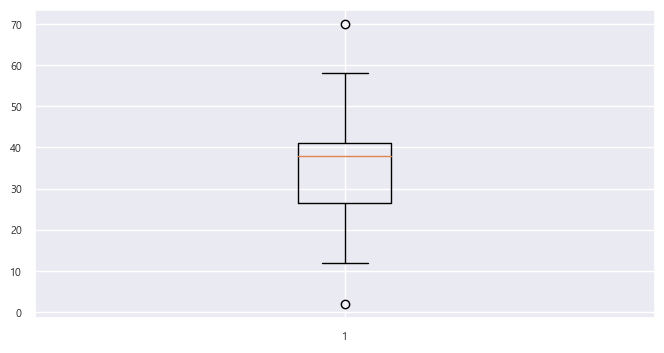

In [98]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터
# data = np.random.randn(100)  # 난수 100개 생성
data = [26,31,2,38,42,26,18,17,25,29,
        39,38,38,40,46,38,39,41,41,40,
        26,19,39,28,45,34,21,41,30,30,
        12,22,48,34,29,26,29,58,70,16,
        42,44,38,44,28,43,39,42,39,46]

Q1 = np.percentile(data, 25, interpolation='nearest') 
Q2 = np.percentile(data, 50, interpolation='nearest') 
Q3 = np.percentile(data, 75, interpolation='nearest')
Q4 = np.percentile(data,100, interpolation='nearest')
print(f'Q1: {Q1}, Q: {Q2}, Q3: {Q3}, Q4: {Q4}')
print(f'중앙값: {np.median(data)}')

# 상자 그래프
plt.boxplot(data)
plt.show()

### [실습문제] 상자그림 그래프 나타내기
정규분포를 이루는 데이터를 임의로 생성시켜 각 데이터를 하나의 그래프에 상자그림(boxplot) 그래프 나타내기

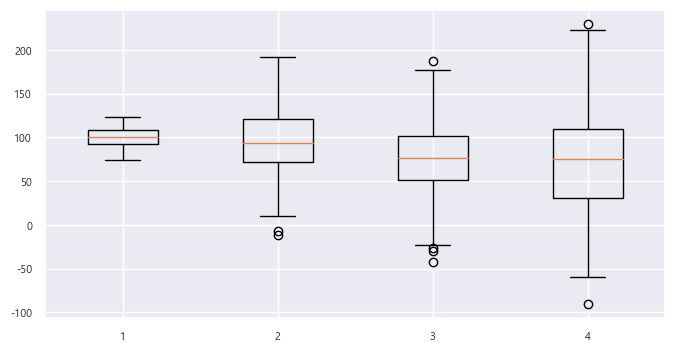

In [99]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

# # 표준 정규분포 (평균0, 분산1) 따르는 난수 200개 씩 생성
data1 = np.random.normal(100, 10, 200)  # 평균 100, 분산 10
data2 = np.random.normal(100, 40, 200)  # 평균 100, 분산 40
data3 = np.random.normal(80, 40, 200)   # 평균 80, 분산 40
data4 = np.random.normal(80, 60, 200)   # 평균 80, 분산 60

# 상자 그래프
plt.boxplot( [data1, data2, data3, data4] )

plt.show()

----------

THE END